In [33]:
from scipy.io import loadmat

mat_data = loadmat("../yeastData310.mat")

yeast = pd.DataFrame(data=mat_data['X'],index =[x[0] for x in mat_data['genes'][:,0]],columns=mat_data['times'] [0])

yeast.reset_index(inplace=True)

yeast.rename(columns={'index':'genes'},inplace=True)

yeast

,genes,0.0,9.5,11.5,13.5,15.5,18.5,20.5
0,YAL012W,0.157,0.175,0.467,-0.379,-0.520,-1.279,-2.125
1,YAL034C,-0.235,0.487,-0.184,-0.669,-1.006,2.369,2.611
2,YAL061W,-0.532,0.028,-0.333,-0.102,1.172,2.087,0.992
3,YBR048W,0.224,0.274,-0.002,-0.211,-0.760,-1.524,-2.145
4,YBR052C,0.049,0.105,0.650,1.310,0.917,2.401,1.715
...,...,...,...,...,...,...,...,...
305,YPL273W,0.151,0.326,2.672,0.075,0.487,-1.092,-1.306
306,YPR136C,0.158,-0.130,-0.880,-0.693,-1.020,-2.387,-1.009
307,YPR156C,0.074,0.535,1.603,1.461,1.580,0.933,2.044
308,YPR184W,-0.195,0.165,-0.333,0.421,0.858,1.633,3.028


<Figure size 1000x800 with 0 Axes>

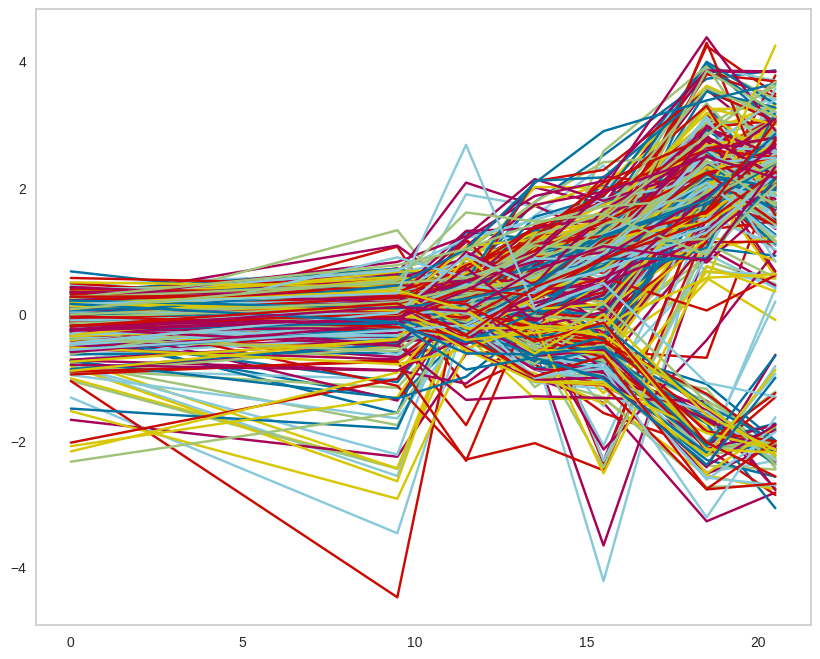

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
gene_exp = yeast.iloc[:, 1:]
gene_exp.T.plot(figsize=(10, 8), legend=None)
plt.grid()

/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/ana

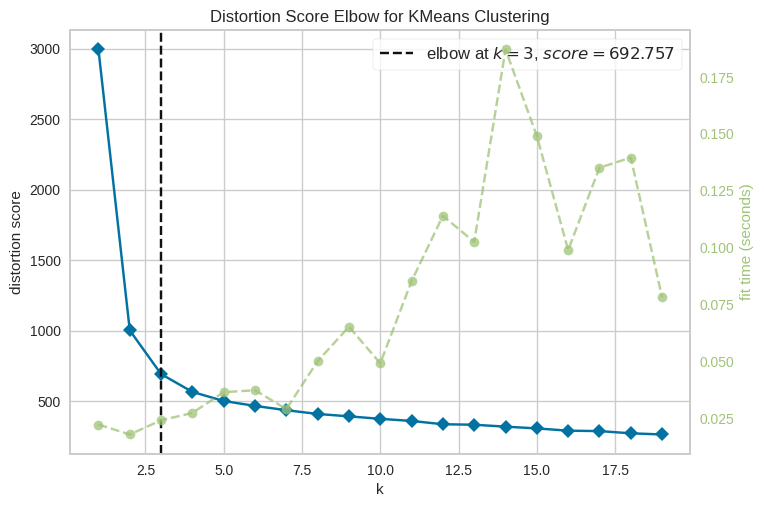

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans= KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 20))

visualizer.fit(gene_exp)
visualizer.show()

/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/ana

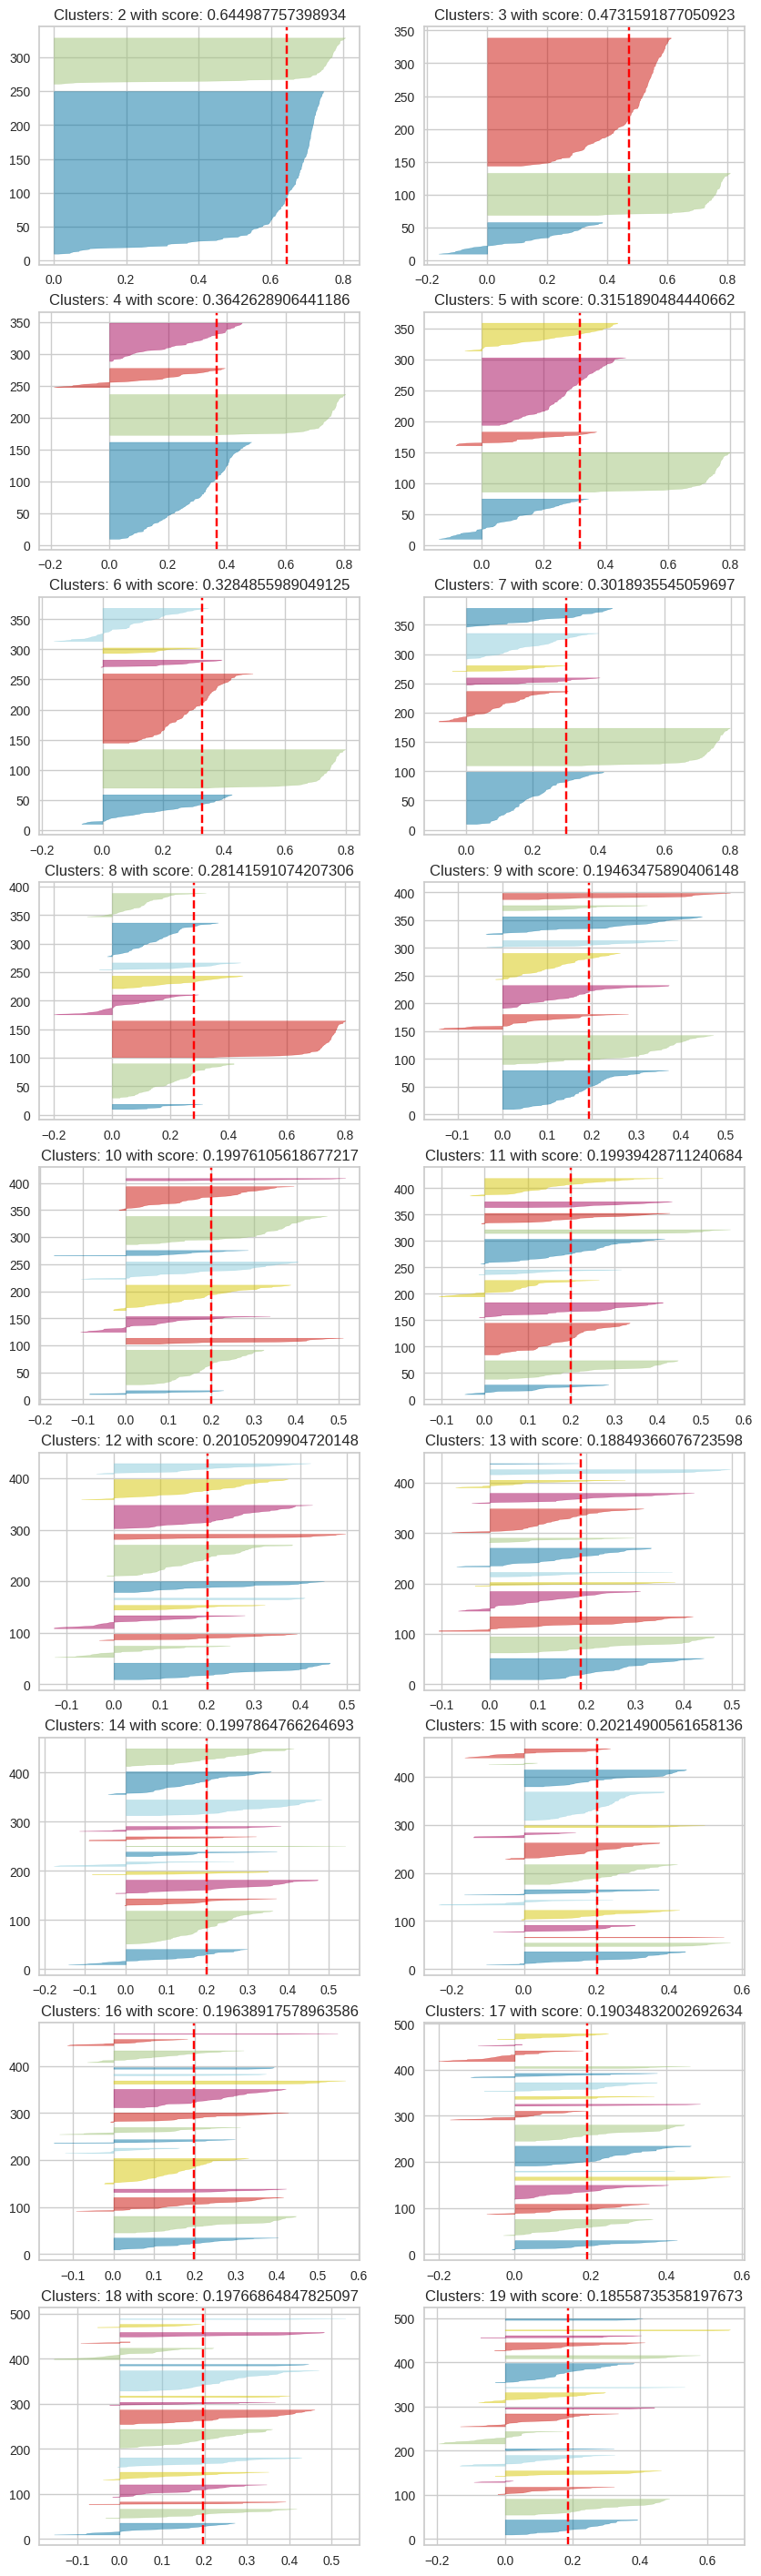

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer

scores = {}
plt.figure(figsize=(2 * 5, 10 * 4))
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(gene_exp)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'Clusters: {n_clusters} with score: {visualizer.silhouette_score_}')
    

In [37]:
sorted(scores.items(), key=lambda x : x[1], reverse=True)

[(2, 0.644987757398934),
 (3, 0.4731591877050923),
 (4, 0.3642628906441186),
 (6, 0.3284855989049125),
 (5, 0.3151890484440662),
 (7, 0.3018935545059697),
 (8, 0.28141591074207306),
 (15, 0.20214900561658136),
 (12, 0.20105209904720148),
 (14, 0.1997864766264693),
 (10, 0.19976105618677217),
 (11, 0.19939428711240684),
 (18, 0.19766864847825097),
 (16, 0.19638917578963586),
 (9, 0.19463475890406148),
 (17, 0.19034832002692634),
 (13, 0.18849366076723598),
 (19, 0.18558735358197673)]

In [38]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(gene_exp)

/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


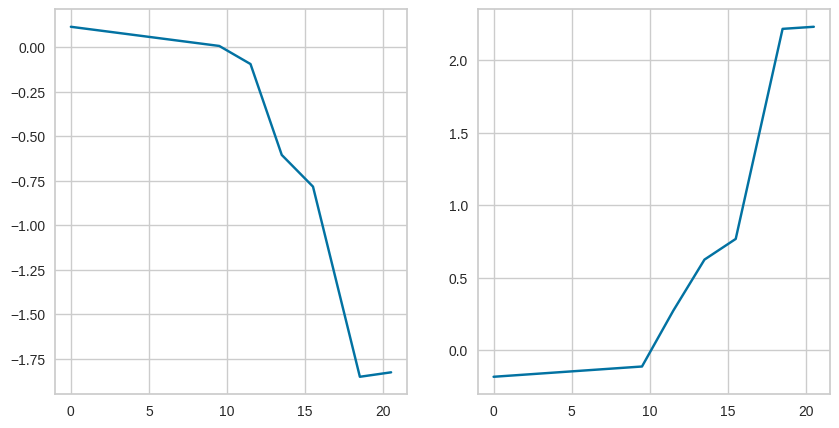

In [39]:
plt.figure(figsize=(10, 5))
xs = [float (x) for x in gene_exp.columns]
for i, cluster_centers in enumerate(kmeans.cluster_centers_):
    plt.subplot(1, 2, i + 1)
    plt.plot(xs, cluster_centers)
    cluster_centers

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(gene_exp)

/home/thomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


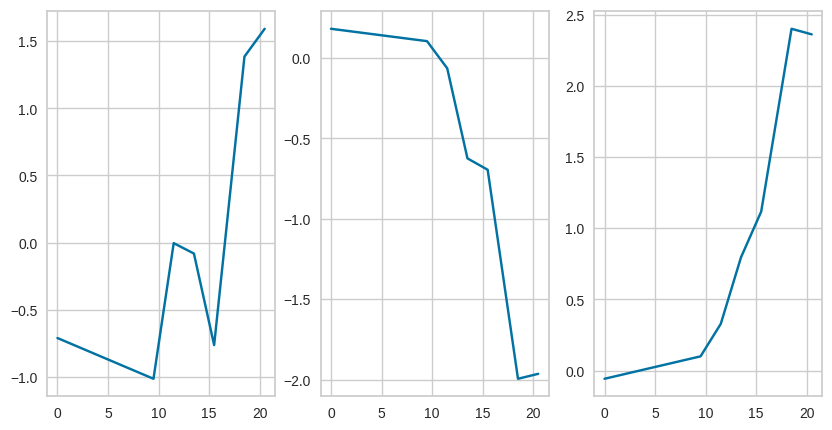

In [41]:
plt.figure(figsize=(10, 5))
xs = [float (x) for x in gene_exp.columns]
for i, cluster_centers in enumerate(kmeans.cluster_centers_):
    plt.subplot(1, 3, i + 1)
    plt.plot(xs, cluster_centers)
    cluster_centers

In [42]:
wines = pd.read_csv('../wines_color.csv')
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wines_scaled = scaler.fit_transform(wines)
kmeans = KMeans(n_clusters=2, random_state=0).fit(wines_scaled)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wines_transformed = pca.fit_transform(wines_scaled)
wines_transformed.shape

(6497, 2)

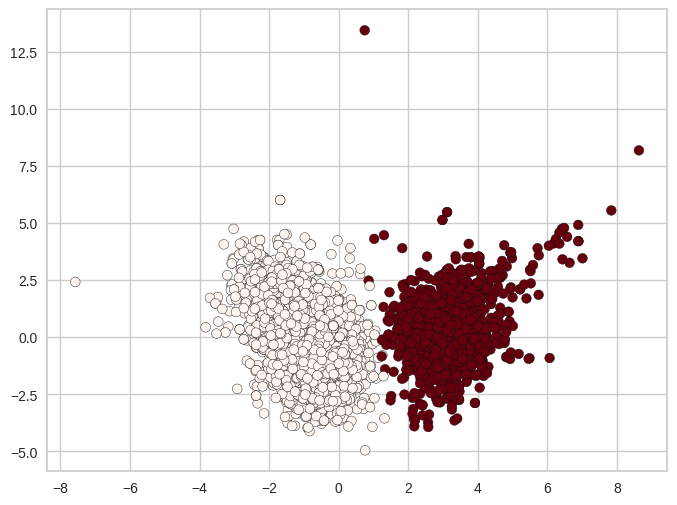

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x=wines_transformed[:, 0], y=wines_transformed[:, 1], c=kmeans.labels_, cmap='Reds', edgecolors='k')
plt.grid(visible=True)

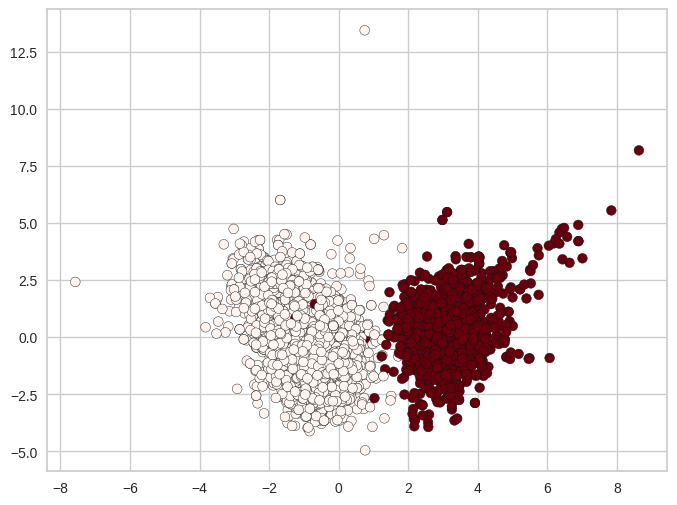

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(x=wines_transformed[:, 0], y= wines_transformed[:, 1], c=wines['color'], edgecolors='k', cmap='Reds')
plt.grid(visible=True)

In [59]:
import numpy as np
from sklearn import metrics

labels = np.where(kmeans.labels_ == 1, 1, 0)
metrics.accuracy_score(labels, wines['color'])

0.9959981529936894